The following ML model will predict if an individual is eligible to be recruited into GDSC or not


  Importing the dependencies:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


ImportError: ignored



 Data collection:

In [ ]:
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

In [ ]:
print(train_data)

      ID  Donation ability  Pokemon  Courses  Tech Stack  IU  Star Wars  \
0    360            877291        6       10          10  10         10   
1    487           1073960       10       10          10  10          6   
2    268            324427       10        8           8   2          3   
3    240           1270479        5        1           3   3          2   
4     31           1071760        2        1           1   1          2   
..   ...               ...      ...      ...         ...  ..        ...   
396   67           1118039        5        3           4   1          8   
397   37           1081791        6        2           1   1          1   
398   55           1111249       10        6           6   3          4   
399    4           1017023        4        1           1   3          2   
400    1           1002945        5        4           4   5          7   

     Extrovert Scale  Projects  Time of Day  Math Skills Category  
0                 10         8 

In [ ]:
print(test_data)

      ID  Donation ability  Pokemon  Courses  Tech Stack  IU  Star Wars  \
0    563           1328755        3        1           1   1          2   
1    650           1319609        3        1           1   2          3   
2    308            667204        7        8           7   6          4   
3    678           1368273        1        1           1   1          2   
4    358            866325        8       10           5   3          8   
..   ...               ...      ...      ...         ...  ..        ...   
96   468           1105524        4        1           1   1          2   
97   698            897471        4        8           8   5          4   
98    18           1050670       10        7           7   6          4   
99   324            740492        1        1           1   1          2   
100  342            814265        2        1           1   1          2   

     Extrovert Scale  Projects  Time of Day  Math Skills  
0                  1         2          

Exploratory Data Analysis:


In [ ]:
#Reading the first 5 rows using head():
test_data.head()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills
0,563,1328755,3,1,1,1,2,1,2,1,1
1,650,1319609,3,1,1,2,3,4,1,1,1
2,308,667204,7,8,7,6,4,3,8,8,4
3,678,1368273,1,1,1,1,2,1,1,1,1
4,358,866325,8,10,5,3,8,4,4,10,3


In [ ]:
train_data.head()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills,Category
0,360,877291,6,10,10,10,10,10,8,10,10,Yes
1,487,1073960,10,10,10,10,6,10,8,1,5,Yes
2,268,324427,10,8,8,2,3,4,8,7,8,Yes
3,240,1270479,5,1,3,3,2,2,2,3,1,No
4,31,1071760,2,1,1,1,2,1,3,1,1,No


In [ ]:
print(train_data.shape)
print(test_data.shape)

(401, 12)
(101, 11)


In [ ]:
#method 1 : checking for missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                401 non-null    int64 
 1   Donation ability  401 non-null    int64 
 2   Pokemon           401 non-null    int64 
 3   Courses           401 non-null    int64 
 4   Tech Stack        401 non-null    int64 
 5   IU                401 non-null    int64 
 6   Star Wars         401 non-null    int64 
 7   Extrovert Scale   401 non-null    int64 
 8   Projects          401 non-null    int64 
 9   Time of Day       401 non-null    int64 
 10  Math Skills       401 non-null    int64 
 11  Category          401 non-null    object
dtypes: int64(11), object(1)
memory usage: 37.7+ KB


From the above output we see that there are no missing values and all the values are of the type "int"

In [ ]:
# method 2 : checking for missing values
train_data.isnull().sum()

ID                  0
Donation ability    0
Pokemon             0
Courses             0
Tech Stack          0
IU                  0
Star Wars           0
Extrovert Scale     0
Projects            0
Time of Day         0
Math Skills         0
Category            0
dtype: int64

In [ ]:
#statistical measures of the data
train_data.describe()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills
count,401.000000,4.010000e+02,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,333.446384,1.078947e+06,4.990025,3.795511,3.860349,3.331671,3.650873,4.274314,3.912718,3.493766,1.825436
std,200.070669,7.780782e+05,2.926585,3.283760,3.171033,3.108411,2.438812,3.879377,2.524849,3.379436,2.045593
min,1.000000,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,162.000000,8.593500e+05,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,320.000000,1.164066e+06,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000
75%,509.000000,1.230175e+06,7.000000,6.000000,6.000000,5.000000,5.000000,10.000000,6.000000,6.000000,1.000000
max,697.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Correlation Matrix:

In [ ]:
sns.set()

Index(['ID', 'Donation ability', 'Pokemon', 'Courses', 'Tech Stack', 'IU',
       'Star Wars', 'Extrovert Scale', 'Projects', 'Time of Day',
       'Math Skills'],
      dtype='object')


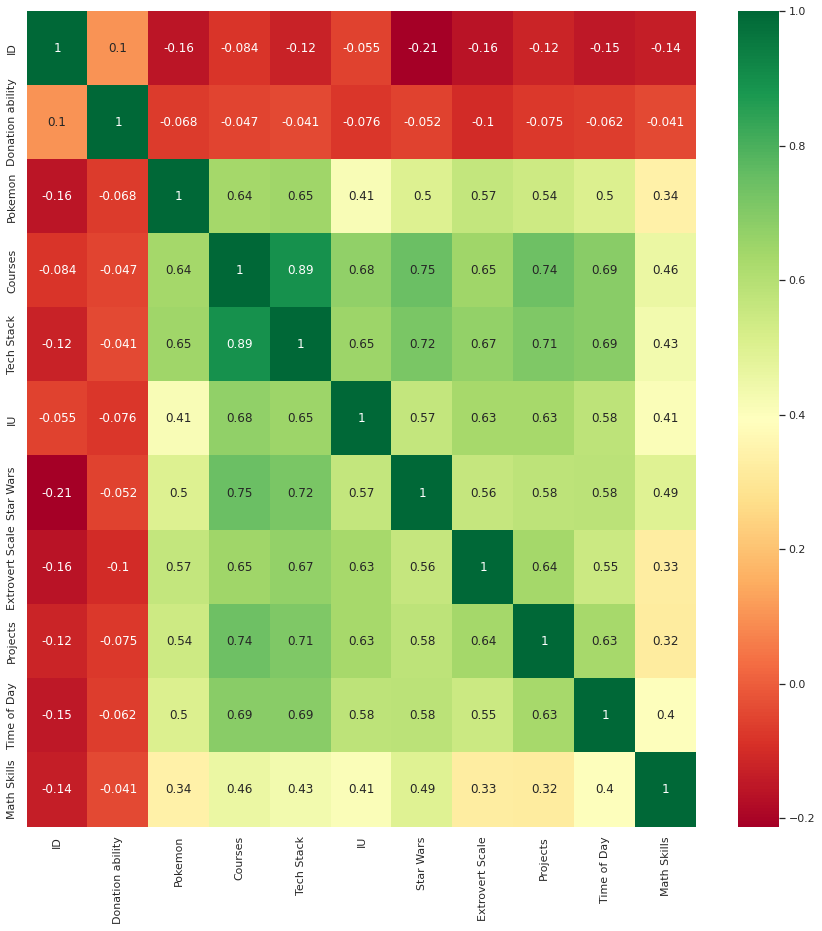

In [ ]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#heat map
s = sns.heatmap(train_data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

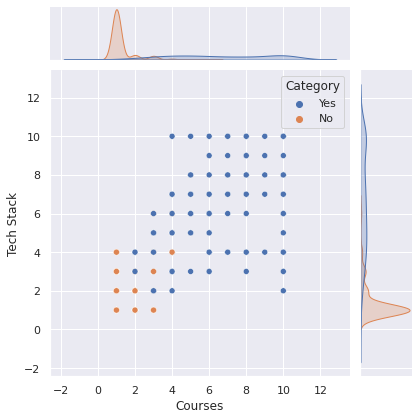

In [ ]:
sns.jointplot(data=train_data,x="Courses",y="Tech Stack",hue="Category")

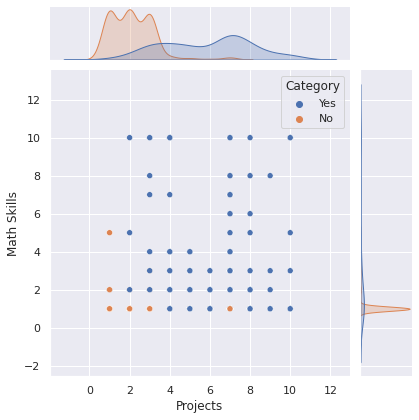

In [ ]:
sns.jointplot(data=train_data,x="Projects",y="Math Skills",hue="Category")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


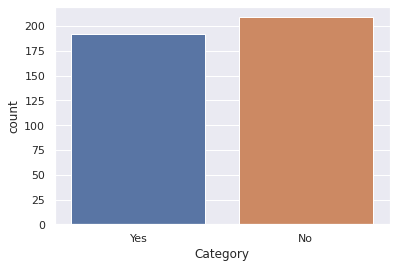

In [ ]:
sns.countplot(train_data['Category'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


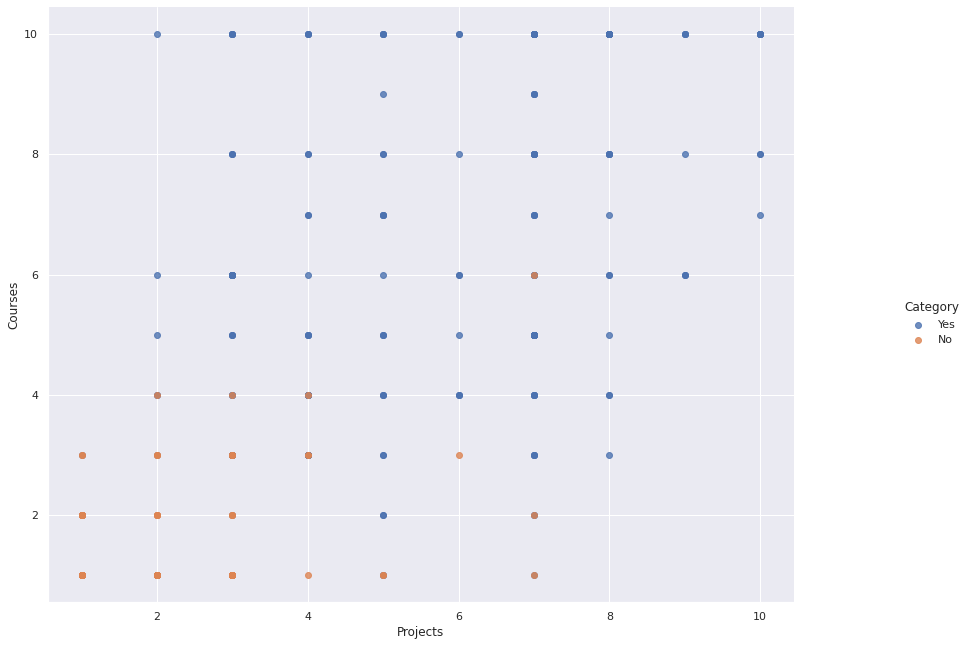

In [ ]:
sns.lmplot('Projects','Courses',train_data,hue='Category', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Statistical Data Analysis

In [ ]:
#Distribution of the target variable:
train_data['Category'].value_counts()

No     209
Yes    192
Name: Category, dtype: int64

The dataset has a good distribution

Before moving further, as the category column or the target column contains categorical values("Yes","No"),  let's change it to numerical values for our model to comprehend.

Data Cleaning:

In [ ]:
# replacing "Yes" - 1 and "No" - 0
train_data['Category'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
train_data.head()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills,Category
0,360,877291,6,10,10,10,10,10,8,10,10,1
1,487,1073960,10,10,10,10,6,10,8,1,5,1
2,268,324427,10,8,8,2,3,4,8,7,8,1
3,240,1270479,5,1,3,3,2,2,2,3,1,0
4,31,1071760,2,1,1,1,2,1,3,1,1,0


In [ ]:
train_data.groupby('Category').mean()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills
Category,,,,,,,,,,,
0,374.105263,1.144933e+06,2.980861,1.267943,1.435407,1.358852,2.066986,1.325359,2.133971,1.263158,1.043062
1,289.187500,1.007119e+06,7.177083,6.546875,6.500000,5.479167,5.375000,7.484375,5.848958,5.921875,2.677083


In [ ]:
#removing unwanted features
X = train_data.drop(columns=['Category'])
Y = train_data['Category']

In [ ]:
X.head()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills
0,360,877291,6,10,10,10,10,10,8,10,10
1,487,1073960,10,10,10,10,6,10,8,1,5
2,268,324427,10,8,8,2,3,4,8,7,8
3,240,1270479,5,1,3,3,2,2,2,3,1
4,31,1071760,2,1,1,1,2,1,3,1,1


In [ ]:
Y.head()

0    1
1    1
2    1
3    0
4    0
Name: Category, dtype: int64

Standardization:

Standardizing the data so that the values are between a certain range and this helps our model to converge faster and perform better

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [ ]:
X_arr = np.asarray(X)
Y_arr = np.asarray(Y)

Data Modelling:

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_arr,Y_arr,test_size=0.2,random_state=3)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

Evaluating the model:

In [ ]:
prediction_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train,prediction_train)

In [ ]:
print("Accuracy score on training data :",accuracy_train)

Accuracy score on training data : 0.978125


In [ ]:
prediction_test = model.predict(X_test)
accuracy_test = accuracy_score(Y_test,prediction_test)

In [ ]:
print("Accuracy score on testing data :",accuracy_test)

Accuracy score on testing data : 0.9506172839506173


Creating a Confusion Matrix:

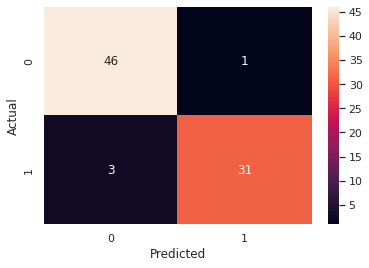

In [ ]:
con_mat = confusion_matrix(Y_test,prediction_test)

sns.heatmap(con_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
features = ['ID','Donation ability','Pokemon','Courses','Tech Stack','IU','Star Wars','Extrovert Scale','Projects','Time of Day','Math Skills']
test_X = test_data[features]
input_data_nparr2 = np.asarray(test_X)
input_data_reshaped2 = input_data_nparr2.reshape(101,-101)
prediction1 = model.predict(input_data_reshaped2)
one = 0
zero = 0
for i in prediction1:
  if i == 1:
    one+=1
  else:
    zero+=1
print(one)
print(zero)


0
101


In [ ]:
features = ['ID','Donation ability','Pokemon','Courses','Tech Stack','IU','Star Wars','Extrovert Scale','Projects','Time of Day','Math Skills']
test_X = test_data[features]
input_data_nparr2 = np.asarray(test_X)
input_data_reshaped2 = input_data_nparr2.reshape(101,-101)
prediction1 = model.predict(input_data_reshaped2)
new_pred =[i for i in prediction1]
for i in range(len(new_pred)):
  if new_pred[i] == 1:
    new_pred[i] = 'Yes'
  else:
    new_pred[i] = 'No'
print(new_pred)



['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
